In [1]:
import sys
sys.path.insert(0, '/Users/mattlowery/Desktop/Desko/code/astro/hetast/src/')

In [69]:
import utils 
import dataset
import numpy as np
import torch
import matplotlib.pyplot as plt
from dataset import DataSet
import os
import utils

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [4]:
%load_ext autoreload
%autoreload

In [16]:
lcs = utils.get_data('../datasets/ZTF_all', sep=',', start_col=1, batch_size=1, min_length=1, n_union_tp=3500, num_resamples=0,shuffle=True, extend=0)
net, optimizer, args, epoch, loss, train_loss, test_loss = utils.load_checkpoint('./h5/final_exps/ZTF_all_noz0.8911595940589905.h5', lcs.data_obj)

torch.manual_seed(args.seed)
np.random.seed(args.seed)

validated 3407 files out of 3407 for band='r'
validated 3407 files out of 3407 for band='i'
validated 3408 files out of 3408 for band='g'
3407 3407
(2683, 3, 4431, 3)
created union_tp attribute of length 3500
dataset created w/ shape (2683, 3, 4431, 3)
train size: 2414, valid size: 242, test size: 269
=> loading checkpoint './h5/final_exps/ZTF_all_noz0.8911595940589905.h5'
Namespace(n_union_tp=3500, data_folder='datasets/ZTF_all_noz', checkpoint='datasets/ZTF_all_noz0.9060470461845398.h5', start_col=1, inc_errors=False, print_at=1, embed_time=128, enc_num_heads=16, latent_dim=64, mixing='concat', num_ref_points=16, rec_hidden=128, width=512, save_at=30, patience=100, early_stopping=False, niters=20000, frac=0.5, batch_size=2, mse_weight=5.0, dropout=0.0, num_resamples=0, lr=1.5e-05, scheduler=False, warmup=4000, kl_zero=False, kl_annealing=True, net='hetvae', device='mps', const_var=False, var_per_dim=False, std=0.1, seed=2, save=True, k_iwae=1)


AttributeError: module 'torch' has no attribute 'mps'

# Plot Learning Curves

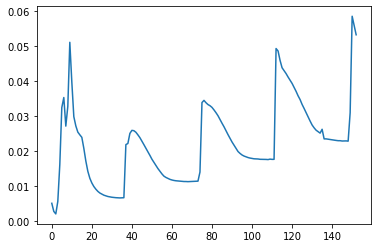

[<AxesSubplot:title={'center':'Learning Curves'}> <AxesSubplot:>
 <AxesSubplot:xlabel='Epoch'>]


Text(0, 0.5, 'KL loss')

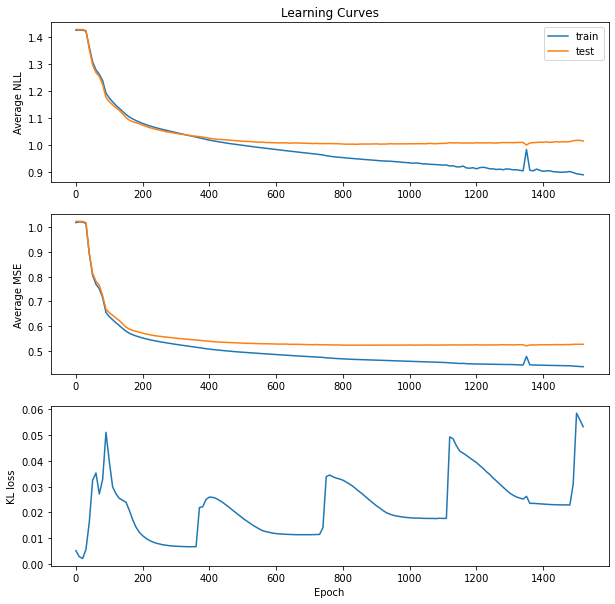

In [37]:
train_l = np.array(train_loss)
test_l = np.array(test_loss)

fig, ax = plt.subplots(3, figsize=(10,10))
ax[0].set_title('Learning Curves')
ax[2].set_xlabel('Epoch')
print(ax)
## NLL
x = np.arange(0,len(train_loss)*10,10) 
ax[0].plot(x,train_l[:,0], label='train')
ax[0].plot(x,test_l[:,0], label='test')
ax[0].legend(loc="upper right")
ax[0].set_ylabel('Average NLL')
## MSE
ax[1].plot(x, train_l[:,1], label='train')
ax[1].plot(x, test_l[:,1], label='test')
ax[1].set_ylabel('Average MSE')
## KL Annealing
ax[2].plot(x,train_l[:,2])
ax[2].set_ylabel('KL loss')



In [30]:
pred_ds = utils.get_data('../datasets/ZTF_rm', sep=',', start_col=1, batch_size=1, min_length=1, n_union_tp=3500, num_resamples=0,shuffle=True, extend=0)  
pred_ds.set_target_x(n=100)


validated 9 files out of 9 for band='r'
validated 10 files out of 10 for band='i'
validated 10 files out of 10 for band='g'
9 9
(8, 3, 2874, 3)
created union_tp attribute of length 3500
dataset created w/ shape (8, 3, 2874, 3)
train size: 7, valid size: 1, test size: 1


In [31]:
pred_ds.valid_files_df

,r,i,g
H2106-099,../datasets/ZTF_rm/r/H2106-099_DR_rband.csv,../datasets/ZTF_rm/i/H2106-099_DR_iband.csv,../datasets/ZTF_rm/g/H2106-099_DR_gband.csv
3C120,../datasets/ZTF_rm/r/3C120_DR_rband.csv,../datasets/ZTF_rm/i/3C120_DR_iband.csv,../datasets/ZTF_rm/g/3C120_DR_gband.csv
NGC5548,../datasets/ZTF_rm/r/NGC5548_DR_rband.csv,../datasets/ZTF_rm/i/NGC5548_DR_iband.csv,../datasets/ZTF_rm/g/NGC5548_DR_gband.csv
MCG+08-11-011,../datasets/ZTF_rm/r/MCG+08-11-011_DR_rband.csv,../datasets/ZTF_rm/i/MCG+08-11-011_DR_iband.csv,../datasets/ZTF_rm/g/MCG+08-11-011_DR_gband.csv
Mrk817,../datasets/ZTF_rm/r/Mrk817_DR_rband.csv,../datasets/ZTF_rm/i/Mrk817_DR_iband.csv,../datasets/ZTF_rm/g/Mrk817_DR_gband.csv
NGC2617,../datasets/ZTF_rm/r/NGC2617_DR_rband.csv,../datasets/ZTF_rm/i/NGC2617_DR_iband.csv,../datasets/ZTF_rm/g/NGC2617_DR_gband.csv
Mrk142,../datasets/ZTF_rm/r/Mrk142_DR_rband.csv,../datasets/ZTF_rm/i/Mrk142_DR_iband.csv,../datasets/ZTF_rm/g/Mrk142_DR_gband.csv
Mrk876,../datasets/ZTF_rm/r/Mrk876_DR_rband.csv,../datasets/ZTF_rm/i/Mrk876_DR_iband.csv,../datasets/ZTF_rm/g/Mrk876_DR_gband.csv


0,1,2,3,4,5,6,(7, 2874) (7, 2874, 3) (7, 2874, 3) (7, 2874, 3) (7, 2874)
nll: 158.2761, mse: 0.8982, mae: 0.7351, mean_mse: 69.4555, mean_mae: 0.7351


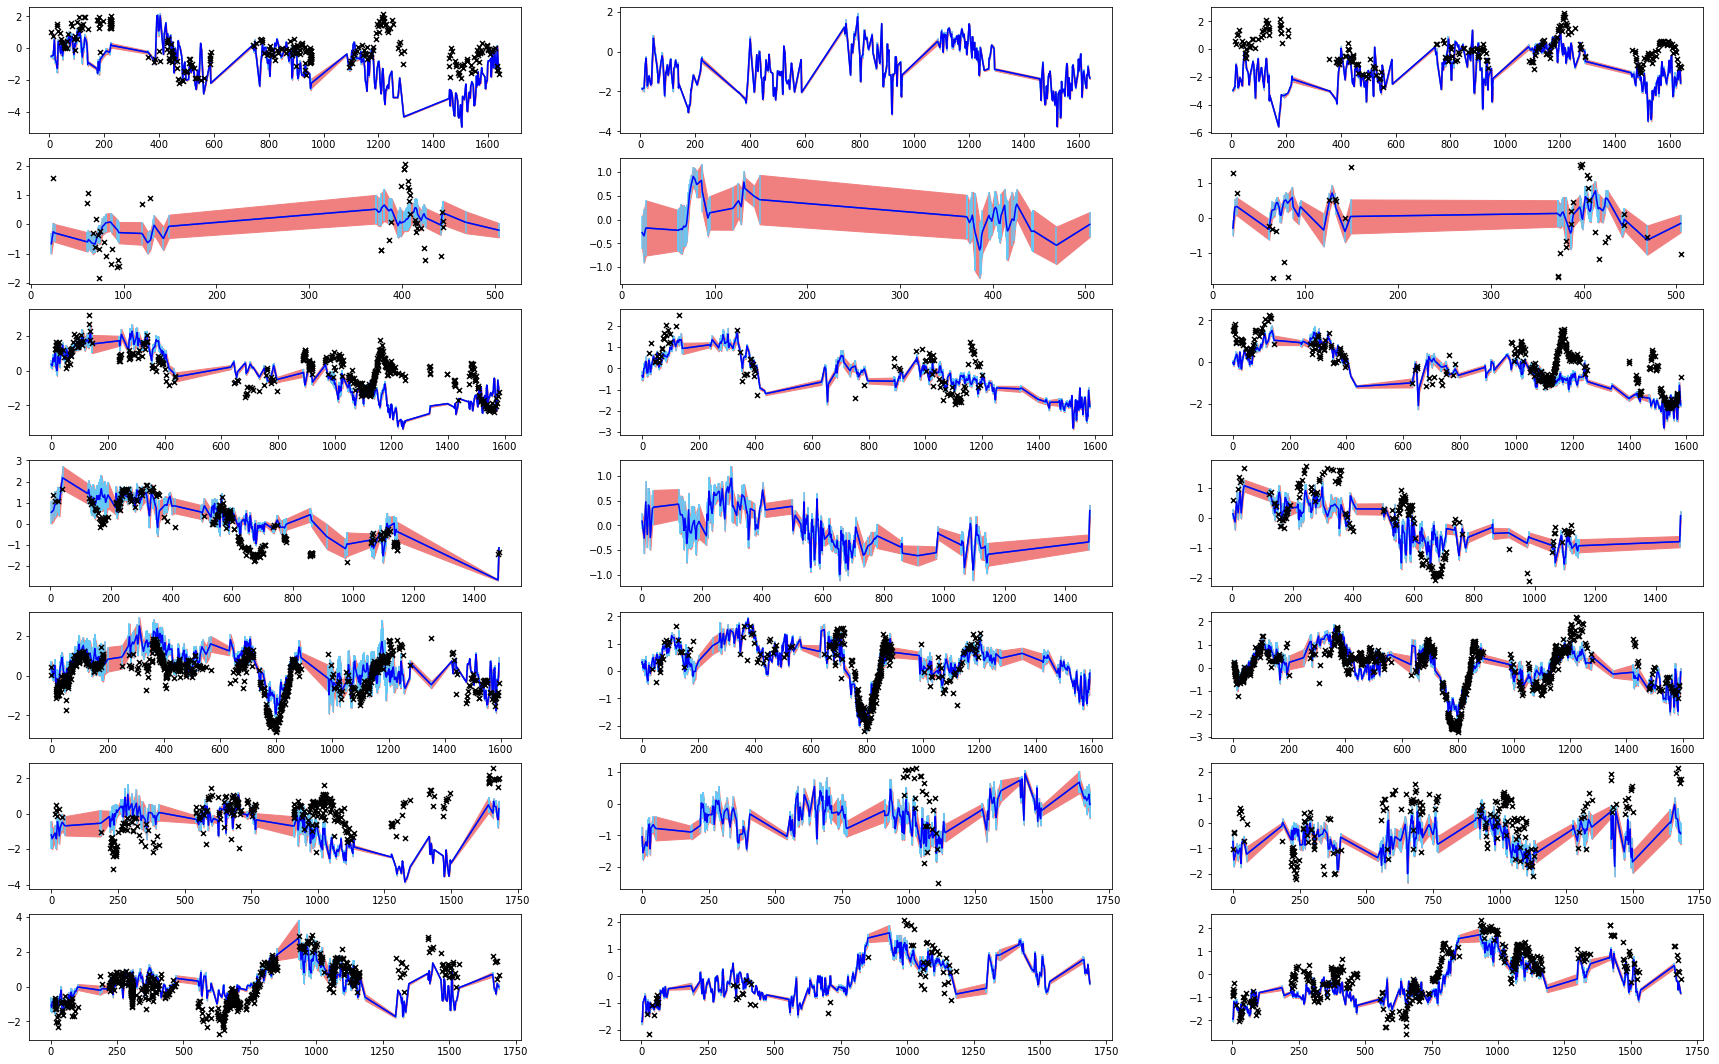

In [125]:
examples, z, recons = utils.predict(pred_ds.data_obj['train_loader'], net, device='mps', subsample=False, target_x=None)
plot_recons(examples,recons,bands=lcs.bands,one_ex=False, figsize=(30,19))
# save_recon(examples,recons,z, obj_name, bands=lcs.bands, save_folder='test')
avg_nll, avg_mse, nlls = utils.evaluate_hetvae(net,pred_ds.data_obj['input_dim'],pred_ds.data_obj['train_loader'],frac=0.5,k_iwae=1,device='mps')

(7, 2874) (7, 2874, 3) (7, 2874, 3) (7, 2874, 3) (7, 2874)


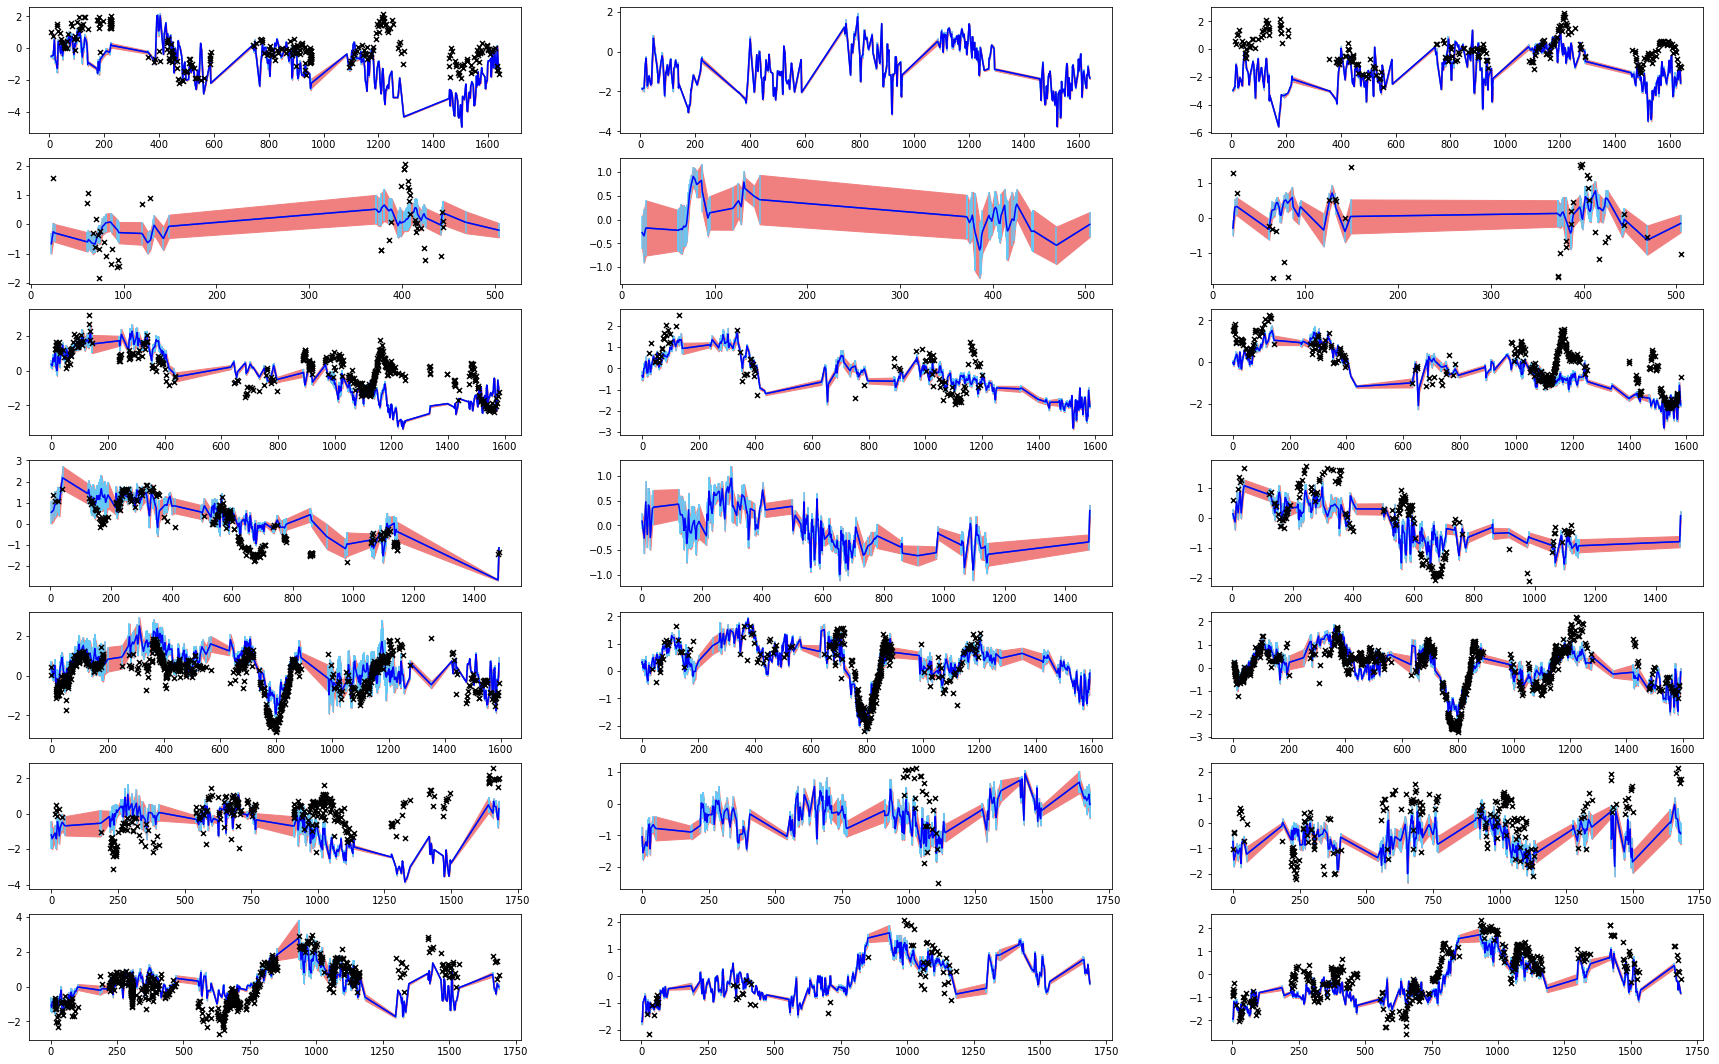

In [33]:
## need to unnormalize...

def plot_recons(examples, recons, object_name = '090743.66+551512.3', one_ex=False, N=7, figsize=(35,5)):
    target_tp = recons['target_tp']
    pred_mean = recons['pred_mean']
    pred_std = recons['pred_std']
    
    target = examples['target']
    inputs = examples['inputs']
    tp = examples['tp']
    dims = pred_mean.shape[2]
    
    # average reconstructions if we're plotting one example
    if one_ex:
        pred_mean= pred_mean.mean(0)[np.newaxis]  
        pred_std = pred_std.mean(0)[np.newaxis]
        N = 1

    fig,ax = plt.subplots(N,dims,figsize=figsize, squeeze=False)
    for ex in range(N):
        pred_t = target_tp[ex].nonzero()[0]
        input_t = tp[ex].nonzero()[0]
        for band in range(dims):
            std = pred_std[ex,pred_t,band]
            # preds plotting
            ax[ex,band].plot(target_tp[ex, pred_t],pred_mean[ex,pred_t,band])
            ax[ex,band].fill_between(target_tp[ex,pred_t],pred_mean[ex,pred_t,band]-std ,pred_mean[ex,pred_t,band]+std, label='error envelope',color='lightcoral')
            ax[ex,band].errorbar(target_tp[ex,pred_t], pred_mean[ex,pred_t,band], yerr=std, c='blue', ecolor='#65c9f7', label='prediction')
            # inputs the preds are conditioned on
            ax[ex,band].scatter(tp[ex,input_t], inputs[ex,input_t,band], c='black', marker='x', zorder=30, label='conditioned on', s=25)
            #ax[ex,band].set_ylim([-2,2])



# Find Anomolies 

In [146]:
# large NLL anomolies
std = np.std(nlls)
mu = np.mean(nlls)
anom_nlls = (nlls>mu+std) | (nlls<mu-std)


# Isolation Forest
IF = IsolationForest(random_state=0, n_estimators=500)
IF.fit(latent)
IF_preds = IF.predict(latent)
anom_IF = IF_preds < 0

anoms = anom_IF | anom_nlls

# Visualize Latent Space

In [ ]:
RS = 20150101
latent = z['qz_mean'].reshape((len(z['qz_mean']), -1))
## change colors of outliers? 
## change colors of test set? 

In [116]:
# TSNE 
tsne2d = TSNE(perplexity=1, random_state=RS).fit_transform(latent)
tsne3d = TSNE(n_components=3, perplexity=1, random_state=RS).fit_transform(latent)
# PCA
pca3d = PCA(n_components=3, random_state=RS).fit_transform(latent) 

/opt/homebrew/Caskroom/miniforge/base/envs/hetvae/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/hetvae/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/hetvae/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/hetvae/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


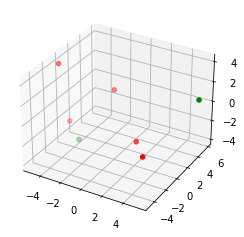

In [147]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pca3d[~anoms,0],pca3d[~anoms,1],pca3d[~anoms,2],c='red')
ax.scatter(pca3d[anoms,0],pca3d[anoms,1],pca3d[anoms,2],c='green')

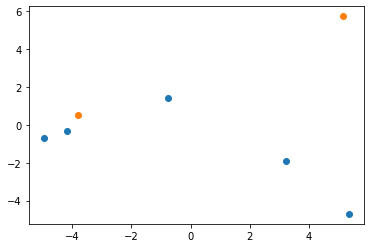

In [119]:
plt.scatter(pca3d[~anoms,0],pca3d[~anoms,1])
plt.scatter(pca3d[anoms,0],pca3d[anoms,1])

In [ ]:
# configure hparams for these plots 